# Topic Modeling

In natural language understanding (NLU) tasks, there is a hierarchy of lenses through which we can extract meaning — from words to sentences to paragraphs to documents. At the document level, one of the most useful ways to understand text is by analyzing its topics. The process of learning, recognizing, and extracting these topics across a collection of documents is called topic modeling.

Topic modeling is a text mining technique which provides methods for identifying co-occurring keywords to summarize large collections of textual information. It helps in discovering hidden topics in the document, annotate the documents with these topics, and organize a large amount of unstructured data. Topic Modeling automatically discover the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes. For example, a group words such as 'patient', 'doctor', 'disease', 'cancer', ad 'health' will represents topic 'healthcare'. Topic Modeling is a different game compared to rule-based text searching that uses regular expressions.

<img src="images/image_1.png" alt="Topic Modeling" style="width: 80%"/>


#### Comparison Between Text Classification and topic modeling

Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics". It is a form of unsupervised learning, so the set of possible topics are unknown. Topic modeling can be used to solve the text classification problem. Topic modeling will identify the topics presents in a document" while text classification classifies the text into a single class.

<img src="images/image_2.png" alt="Topic Modeling vs Image Classification" style="width: 80%"/>


# Latent Semantic Index (LSI)

LSI (Latent Semantic Index) also known as LSA (Latent Semantic Analysis). LSI uses bag of word (BoW) model, which results in a term-document matrix (occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition (SVD). LSI is typically used as a dimension reduction or noise reducing technique.

<img src="images/image_3.png" alt="Latent Semantic Index" style="width: 80%"/>


# Singular Value Decomposition (SVD)

SVD is a matrix factorization method that represents a matrix in the product of two matrices. More concretely, the SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor). SVD is an exact decomposition, since the matrices it creates are big enough to fully cover the original matrix. SVD is extremely widely used in linear algebra, and specifically in data science.

$$
M = U \Sigma V^\ast
$$

- $M$ is an m×m matrix
- $U$ is a m×n left singular matrix
- $\Sigma$ is a n×n diagonal matrix with non-negative real numbers.
- $V$ is a m×n right singular matrix
- $V^\ast$ is n×m matrix, which is the transpose of the V.


# Implementation of LSI using SVD

We will now take a dataset of documents in several different categories, and find topics (consisting of groups of words) for them. Knowing the actual categories helps us evaluate if the topics we find make sense. We will try to achieve this by the SVD matrix factorization method.

For this task, we will be using the `20 Newsgroups` dataset. Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics. [(Dataset Usage details - Scikit Learn)](https://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset)

#### Imports

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

#### Setup and explore data

In [2]:
# Setup Data
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

print(newsgroups_train.filenames.shape, newsgroups_train.target.shape)

(2034,) (2034,)


In [3]:
# Explore Data
print("\n".join(newsgroups_train.data[:3]))

print(np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [4]:
print(newsgroups_train.target[:10])

[1 3 2 0 2 0 2 1 2 1]


Note: The target attribute is the integer index of the category.

#### Feature extraction
We will now extract features like word count and the term frequency-inverse document frequency (tf-idf) from the dataset. For this we will use Scikit Learn.

In [10]:
# Import relevant helper functions
from sklearn.feature_extraction.text import CountVectorizer

# Extract features
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)

print(len(newsgroups_train.data), vectors.shape)

# Generate vocabulary
vocab = np.array(vectorizer.get_feature_names())

# Visualize vocabulary
print(vocab.shape)
vocab[5000:5020]

2034 (2034, 26576)
(26576,)


array(['brow', 'brown', 'browning', 'browns', 'browse', 'browsing',
       'bruce', 'bruces', 'bruise', 'bruised', 'bruises', 'brunner',
       'brush', 'brushmapping', 'brushmaps', 'brussel', 'brutal',
       'brutally', 'brute', 'bryan'], dtype='<U80')

#### Apply Matrix Factorization

We will now apply SVD to our feature vectors.

In [11]:
# Apply SVD
U, s, Vh = linalg.svd(vectors, full_matrices=False)

# Visualize the shape of each of the output variable
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [16]:
s.shape

(2034,)

#### Topics

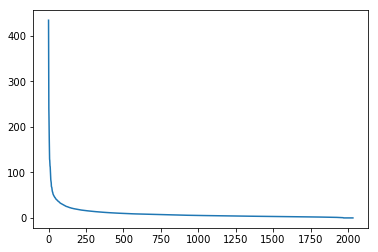

In [12]:
plt.plot(s);

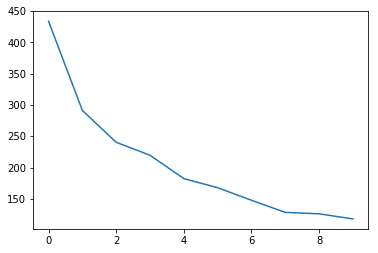

In [13]:
plt.plot(s[:10])

In [14]:
# Display the top 8 words for each topics
num_top_words = 8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = [top_words(t) for t in a]
    return [' '.join(t) for t in topic_words]

# Function call
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

We should see that we get topics that match the kinds of clusters we would expect! This is despite the fact that this is an unsupervised algorithm - which is to say, we never actually told the algorithm how our documents are grouped.